# Main Goals

We will get some hands on experience with applying SVM and Random Forests algorithms for classification problems. For understanding a bit better the theoretical part of SVM, we will practice a concrete example of using a kernel to get a linear separability in a higher dimension. We will then apply a Decision Tree classsifier and random forest on the MNIST hand written digits dataset.

# SVM with a polynomial kernel

We have given data $x=(x_1,x_2)\in\mathbb{R}^2$ that is known to be labeled using the function
$$
y = \text{sign}(3x_1^2 - x_2 - 2)
$$

We use the polynomial transformation into a higher dimensional space, with a polynomial degree 2, and write down a separating hyperplane **in that higher dimension** such that all the samples will be classified correctly. That is, find $w$ and $b$ such that
$$
\forall(x,y):\,\,\,\text{sign}(w^T\phi(x)+b)=y
$$
where 
$$
\phi(x)=\phi(x_1,x_2)=(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2)
$$

To find $w$ and $b$ we calculate $w^T\phi(x)+b$ as it equals to $3x_1^2 - x_2 - 2$.

We obtain that:

$$(w_1 w_2 w_3 w_4 w_5 w_6)^T(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2) + b = 3x_1^2 - x_2 - 2$$

By identification we obtain that:
$$
\begin{cases}
w = (0, 3, 0, 0, \frac{-1}{\sqrt{2}}, 0 ,0) \\
b = -2
\end{cases}
$$

Using the result above, we know there is a linear separating hyperplane in the 2-degree polynomial higher dimension space. That means we should be able to use SVM with a polynomial kernel of degree 2 to perfectly separate the classes.

- Apply such SVM on the 4 points sample set provided below (make sure to set `coef0=1`)
- Draw the resulting separarting hyperplane and show the support vectors in the original 2D space.
- Compare the results with the true function that generates that data.
- Create a new training data set with 100 samples (use the provided function) and repeat the steps above. Did our results change? What about 500 samples?
- How does the number of support vectors relative to the sample set size changes as we increase the sample set size? What does it mean?
- Write our conclusions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary(x1, x2):
    return 3*x1**2 - x2 - 2

def generate_data(m, seed=None):
    # if seed is not None, this function will always generate the same data
    np.random.seed(seed)
    X1 = np.random.uniform(low=-2.0, high=2.0, size=(m,1))
    X2 = np.random.uniform(low=-3.0, high=9.0, size=(m,1))
    X = np.hstack((X1, X2))
    y = np.sign(true_boundary(X[:,0], X[:,1]))
    y[y==0] = 1  
    return X, y

def plot_labeled_data(X, y):
    plt.scatter(X[(y==1),0], X[(y==1),1], c='r')
    plt.scatter(X[(y==-1),0], X[(y==-1),1], c='b')
    plt.xlim([-2, 2]);
    plt.ylim([-3, 9]);
    plt.plot(np.linspace(-2,2,100), true_boundary(np.linspace(-2,2,100), np.zeros(100)), linewidth=2, c='k');


def plot_decision_plane(X, y, clf, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Blues)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.show()

def compare_results(y, y_pred):
    cnt = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            cnt += 1
    return cnt*100/len(y)

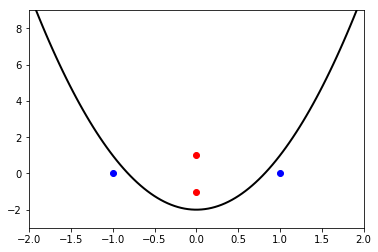

In [2]:
# the sample set
X = np.array([[-1,  0],
              [ 1,  0],
              [ 0, -1],
              [ 0,  1]])

y = np.array([-1,
              -1,
               1,
               1])

plot_labeled_data(X, y)

## Run SVM

In [3]:
from sklearn.svm import SVC

In [4]:
clf = SVC(coef0=1, kernel='poly', degree=2)
clf.fit(X, y)
y_pred = clf.predict(X)
y_pred

array([-1, -1,  1,  1])

## Get position of support vectors

In [5]:
sup_vectors = clf.support_vectors_
print('There is {} support vectors: {}'.format(len(sup_vectors), sup_vectors))

There is 4 support vectors: [[-1.  0.]
 [ 1.  0.]
 [ 0. -1.]
 [ 0.  1.]]


## Plot SVM

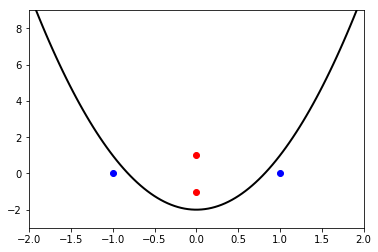

In [6]:
plot_labeled_data(X, y_pred)

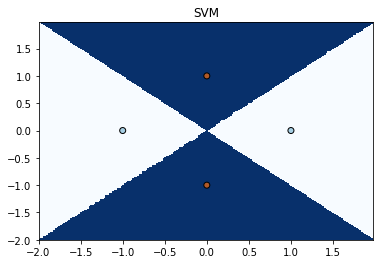

In [7]:
plot_decision_plane(X, y_pred, clf, title='SVM')

## Compare results

In [8]:
res = compare_results(y, y_pred)
print('the precentage of success is: {}%'.format(res))

the precentage of success is: 100.0%


## For 100

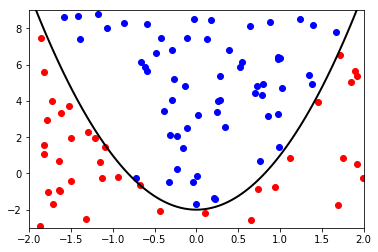

In [9]:
X, y = generate_data(100, seed=None)
plot_labeled_data(X, y)

In [10]:
clf = SVC(coef0=1, kernel='poly', degree=2)
clf.fit(X, y)
y_pred = clf.predict(X)

In [11]:
sup_vectors = clf.n_support_
print('There is {} support vectors: {}'.format(np.sum(sup_vectors), sup_vectors))

There is 58 support vectors: [29 29]


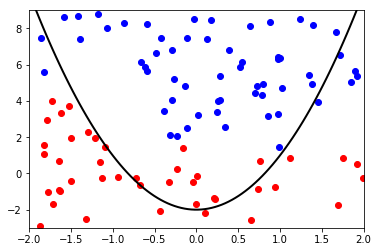

In [12]:
plot_labeled_data(X, y_pred)

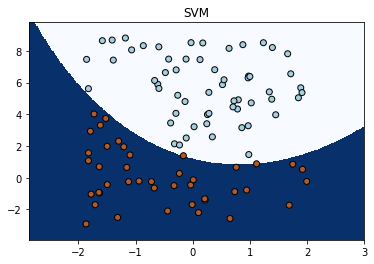

In [13]:
plot_decision_plane(X, y_pred, clf, title='SVM')

In [14]:
res = compare_results(y, y_pred)
print('the precentage of success is: {}%'.format(res))

the precentage of success is: 83.0%


We see that the decision plane looks like a polynomial wit a degree 2 and we start to loose some precision. But it still completely separeted.

## For 500

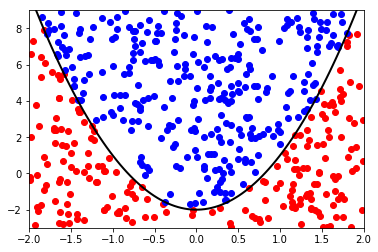

In [15]:
X, y = generate_data(500, seed=None)
plot_labeled_data(X, y)

In [16]:
clf = SVC(coef0=1, kernel='poly', degree=2)
clf.fit(X, y)
y_pred = clf.predict(X)

In [17]:
sup_vectors = clf.n_support_
print('There is {} support vectors: {}'.format(np.sum(sup_vectors), sup_vectors))

There is 229 support vectors: [115 114]


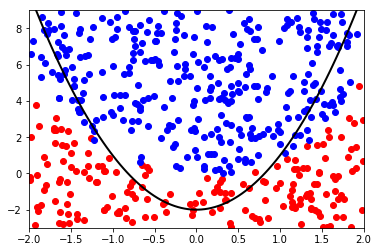

In [18]:
plot_labeled_data(X, y_pred)

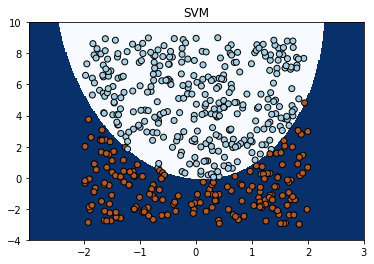

In [19]:
plot_decision_plane(X, y_pred, clf, title='SVM')

In [20]:
res = compare_results(y, y_pred)
print('the precentage of success is: {}%'.format(res))

the precentage of success is: 86.6%


Normally we expected, for 500 points, to obtain a precentage of precision less than the 100 points previously calculated. However we obtain a percentage of 86.6%.

If we check the number of supports vectors, we see that for 100 data points, we have 58 support vectors, which makes a ration of 0.58. For 500 data points, we get 229 support vectors, thus a ratio of 0.458, which is less than 0.58. In this case it normal that with 500 data points and 229 support vectors, the svm has a better precision.

# Using Decision Tree and Random Forest for Digits Classification

We will now test the power of decision trees on this problem.

- We choose which model parameters we wish to optimize, we explain how would we do that, and find a model which we believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
- Once we are satisfied with the model parameters, we plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision.
- Last, we estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.

In [22]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd

In [24]:
mnist = sklearn.datasets.load_digits()
X = mnist.data
y = mnist.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Decision Tree

For the decision tree model, we choose to tune criterias Gini and Entropy with the constraint Max_depth.
In fact Gini and the Entropy are used to optimize the gain function and the depth of tree plays a role against the overfitting.

Thus, we will perform the calculation of the generalization error function of those 3 parameters.

In [26]:
def decision_tree_performance(X, y, split_size, criteria, max_depth):
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size)
    #
    general_errors = []
    for d in max_depth:
        clf = DecisionTreeClassifier(criterion=criteria, max_depth=d)
        clf.fit(X_train, y_train)
        y_test_pred = clf.predict(X_test)
        #
        err = accuracy_score(y_test, y_test_pred)
        general_errors.append(err)

    return general_errors, clf

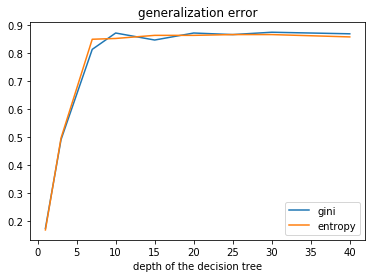

In [27]:
max_depth = [1, 3, 7, 10, 15, 20, 25, 30, 40]
for criteria in ['gini', 'entropy']:
    general_errors = decision_tree_performance(X, y, 0.2, criteria, max_depth)[0]
    plt.plot(max_depth, general_errors, label=criteria)
plt.title('generalization error')
plt.xlabel('depth of the decision tree')
plt.legend()
plt.show()

We see that the best depth of the decision tree is 15. After we know that the model will start to overfitting.
Moreover, the entropy and the gini have the same performance at a depth of 15. We decide to choose the entropy criteria.

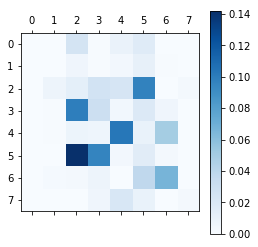

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.90      0.80      0.85        46
           2       0.91      0.85      0.88        47
           3       0.79      0.87      0.82        38
           4       0.82      0.88      0.85        32
           5       0.74      0.72      0.73        32
           6       0.92      0.92      0.92        36
           7       0.90      0.84      0.87        31
           8       0.74      0.84      0.79        31
           9       0.90      0.92      0.91        39

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



In [29]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=15)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
importances = clf.feature_importances_
#
importances = importances.reshape((8, 8))
plt.matshow(importances, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
#
print(classification_report(y_test, y_test_pred))

The accuracy of the decision tree is 86% which is not so bad. We see that the class 8, 5 and 3 have the worst precision and recall. The decision tree realizes too much false positif for these classes.

In [30]:
pred_prob = clf.predict_proba(X_test)
df_pred_proba = pd.DataFrame(pred_prob, columns=['0','1','2','3','4','5','6','7','8','9'])
df_pred_proba['True_Classe'] = y_test
df_pred_proba['Predicted'] = y_test_pred
df_pred_proba.head(20)

,0,1,2,3,4,5,6,7,8,9,True_Classe,Predicted
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,4
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,7
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,8
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,6
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,5


In [31]:
cnt_fail_class = np.zeros(10)
for i in range(len(y_test)):
    v = df_pred_proba[df_pred_proba.True_Classe == y_test[i]].shape[0]
    if y_test_pred[i] != y_test[i]:
        cnt_fail_class[int(y_test[i])] += 1/v
cnt_fail_class

array([0.03571429, 0.19565217, 0.14893617, 0.13157895, 0.125     ,
       0.28125   , 0.08333333, 0.16129032, 0.16129032, 0.07692308])

Here we can see that some classes have a high probabilities to fail. For exemple the classe 5 has 28% to fail. 

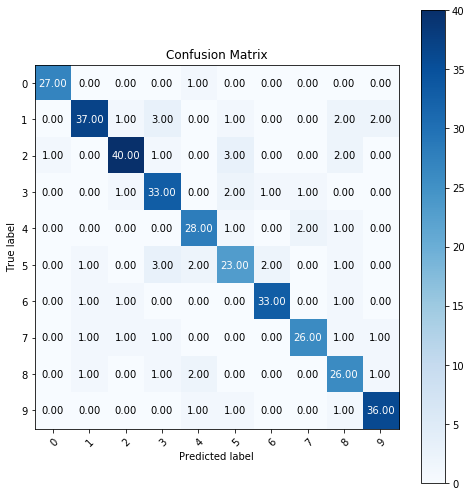

In [32]:
# define confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
# define name of classes
classes = unique_labels(y_test, y_test_pred)
# define the plot of the confusion matrix
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f' 
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

## Random Forest

In [33]:
def random_forest_performance(X, y, split_size, criteria, max_depth):
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size)
    #
    general_errors = []
    for d in max_depth:
        clf = RandomForestClassifier(criterion=criteria, max_depth=d)
        clf.fit(X_train, y_train)
        y_test_pred = clf.predict(X_test)
        #
        err = accuracy_score(y_test, y_test_pred)
        general_errors.append(err)

    return general_errors, clf

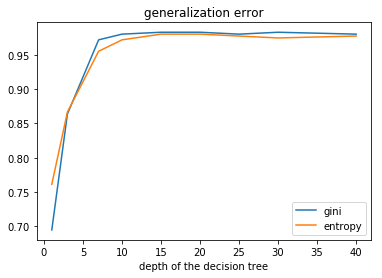

In [34]:
max_depth = [1, 3, 7, 10, 15, 20, 25, 30, 40]
for criteria in ['gini', 'entropy']:
    general_errors = random_forest_performance(X, y, 0.2, criteria, max_depth)[0]
    plt.plot(max_depth, general_errors, label=criteria)
plt.title('generalization error')
plt.xlabel('depth of the decision tree')
plt.legend()
plt.show()

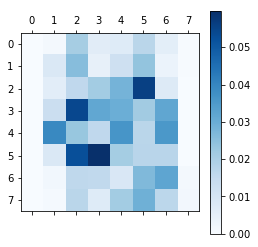

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.98      0.98      0.98        46
           2       1.00      1.00      1.00        47
           3       1.00      0.95      0.97        38
           4       1.00      0.97      0.98        32
           5       0.94      0.97      0.95        32
           6       1.00      1.00      1.00        36
           7       0.94      0.97      0.95        31
           8       0.94      0.94      0.94        31
           9       0.97      1.00      0.99        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [36]:
clf = RandomForestClassifier(criterion='entropy', max_depth=15)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
importances = clf.feature_importances_
#
importances = importances.reshape((8, 8))
plt.matshow(importances, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
#
print(classification_report(y_test, y_test_pred))

We obtain an accuracy of 98% which is much more better compared to the decision tree. Each classes are comparables in term in precision and recall.

Moreover we observe that th random forest uses more features than the decision tree classifier.

In [37]:
pred_prob = clf.predict_proba(X_test)
df_pred_proba = pd.DataFrame(pred_prob, columns=['0','1','2','3','4','5','6','7','8','9'])
df_pred_proba['True_Classe'] = y_test
df_pred_proba['Predicted'] = y_test_pred
df_pred_proba.head(20)

,0,1,2,3,4,5,6,7,8,9,True_Classe,Predicted
0,0.11,0.10,0.16,0.01,0.09,0.03,0.07,0.04,0.37,0.02,8,8
1,0.00,0.01,0.01,0.02,0.00,0.87,0.00,0.00,0.03,0.06,5,5
2,0.00,0.02,0.05,0.74,0.01,0.00,0.01,0.02,0.10,0.05,3,3
3,0.02,0.00,0.01,0.00,0.03,0.07,0.79,0.01,0.04,0.03,6,6
4,0.00,0.02,0.06,0.07,0.00,0.00,0.01,0.00,0.81,0.03,8,8
5,0.06,0.06,0.00,0.00,0.78,0.02,0.01,0.01,0.01,0.05,4,4
6,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.96,0.01,0.01,7,7
7,0.00,0.01,0.00,0.00,0.02,0.00,0.96,0.00,0.00,0.01,6,6
8,0.01,0.01,0.01,0.88,0.00,0.01,0.00,0.05,0.01,0.02,3,3
9,0.02,0.01,0.01,0.16,0.00,0.10,0.00,0.00,0.14,0.56,9,9


In [38]:
cnt_fail_class = np.zeros(10)
for i in range(len(y_test)):
    v = df_pred_proba[df_pred_proba.True_Classe == y_test[i]].shape[0]
    if y_test_pred[i] != y_test[i]:
        cnt_fail_class[int(y_test[i])] += 1/v
cnt_fail_class

array([0.        , 0.02173913, 0.        , 0.05263158, 0.03125   ,
       0.03125   , 0.        , 0.03225806, 0.06451613, 0.        ])

For the random forest, we can see a reduction of mistakes. Each classe has less than 1% of failure.

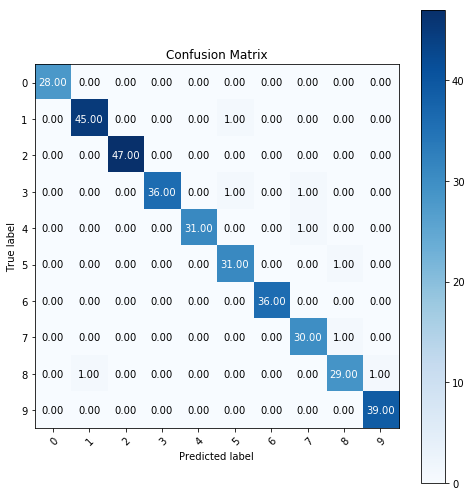

In [39]:
# define confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
# define name of classes
classes = unique_labels(y_test, y_test_pred)
# define the plot of the confusion matrix
cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f' 
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

# References
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/